# Régrassion Linéaire simple

Nous importons les librairies :

In [31]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

1. DATASET

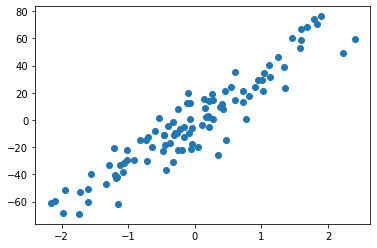

In [52]:
x, y = make_regression(n_samples = 100, n_features=2, noise=10)
plt.scatter(x[:,0],y)

In [53]:
print(x.shape)
y = y.reshape(y.shape[0],1) #redimessionner
print(y.shape)

(100, 2)
(100, 1)


In [54]:
#matrice X
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:10])              

(100, 3)
[[ 0.10619065 -1.93571778  1.        ]
 [ 1.58634107 -0.51231864  1.        ]
 [ 1.02541329 -0.1347697   1.        ]
 [ 0.26236932 -0.38153375  1.        ]
 [ 1.2519021   0.50359205  1.        ]
 [ 0.59867476 -0.2573198   1.        ]
 [-1.71796167  0.4496839   1.        ]
 [ 0.81451063 -1.96315193  1.        ]
 [-1.28184419  0.89462138  1.        ]
 [ 0.17422327 -1.3870588   1.        ]]


In [55]:
theta = np.random.randn(3,1)
theta

array([[-0.34952019],
       [ 1.48176819],
       [-0.14997733]])

2. MODELE

In [57]:
def model(X,theta):
    return X.dot(theta) #produit matriciel

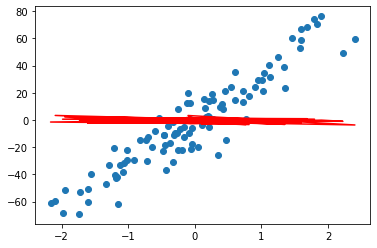

In [58]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],model(X,theta), c='r')

In [59]:
#Fonction cout

In [68]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [69]:
cost_function(X,y,theta)

584.7095304820423

In [62]:
#Gradient descent

In [63]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [64]:
def gradient_descent(X,y,theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] =  cost_function(X,y,theta)
    return theta, cost_history

In [65]:
#Machine learning

In [66]:
theta_final, cost_history = gradient_descent(X,y,theta, learning_rate=0.01, n_iteration=1000)

In [70]:
theta_final

array([[ 3.20961061e+01],
       [ 7.94783666e+00],
       [-3.03946782e-03]])

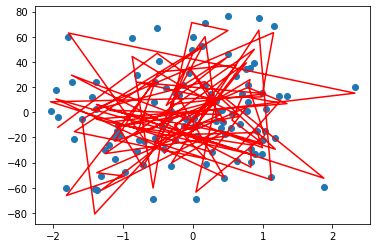

In [72]:
predictions = model(X,theta_final)
plt.scatter(x[:,1],y)
plt.plot(x[:,1],predictions, c='r')

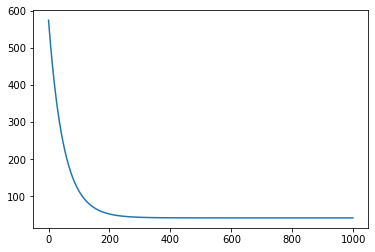

In [73]:
plt.plot(range(1000), cost_history)

In [74]:
#Coef de determination

In [75]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [76]:
coef_determination(y, predictions)

0.9295841519070838